In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

In [68]:
#Convert to png
load_img='D:/48h_DMSO.tif [1,0].tif'
save_png_path = 'D:/p.png'
save_contrast_img = 'D:/c.png'

im = Image.open(load_img)
im.mode = 'I'
im.point(lambda i:i*(1./256)).convert('L').save(save_png_path)

#Change the Contrast
im = Image.open(save_png_path)

#image brightness enhancer
enhancer = ImageEnhance.Contrast(im)

factor = 2 #increase contrast
im_output = enhancer.enhance(factor)
im_output.save(save_contrast_img)

original_img = cv2.imread(save_png_path, cv2.IMREAD_GRAYSCALE)

image = cv2.imread(save_contrast_img, cv2.IMREAD_GRAYSCALE)

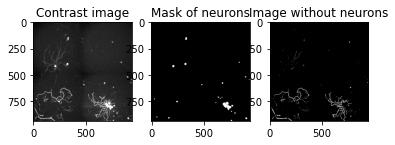

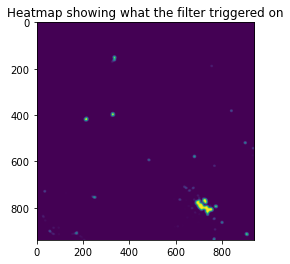

In [73]:
# Threshold the image to get a binary image morphological operators can work on
thresh, image_binary = cv2.threshold(image, 128,255, cv2.THRESH_BINARY)

# Remove really small dots by eroding them
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(7,7))
image_morph = cv2.erode(image_binary.astype(np.uint8), kernel)

# Looking for circles, so make an 11x11 circle filter
#  and filter the image by it. Where ever this output is 'high'
#  there are a lot of pixels under it that are 'high'. So this will
#  highlight circles. Note that the filter size is larger than the
#  dendrites width. This is important otherwise all dendrites will 
#  trigger the filter
k = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
mask = cv2.filter2D(image_morph, cv2.CV_32FC1, k)
mask = mask/np.sum(k)
neuron_heatmap = mask.astype(np.uint8)
thresh, mask_neurons = cv2.threshold(neuron_heatmap, 30, 255, cv2.THRESH_BINARY)

mask_dendrites = image_binary - mask_neurons

# Plot out the results
plt.subplot(1,3,1)
plt.title("Contrast image")
plt.imshow(image, cmap="gray")

plt.subplot(1,3,2)
plt.title("Mask of neurons")
plt.imshow(mask_neurons, cmap="gray")
plt.subplot(1,3,3)
plt.title("Image without neurons")
plt.imshow(mask_dendrites, cmap="gray")
plt.show()

plt.title("Heatmap showing what the filter triggered on")
plt.imshow(neuron_heatmap)
plt.show()

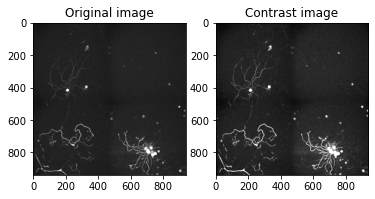

In [74]:
plt.subplot(1,2,1)
plt.title("Original image")
plt.imshow(original_img, cmap="gray")

plt.subplot(1,2,2)
plt.title("Contrast image")
plt.imshow(image, cmap="gray")

plt.show()

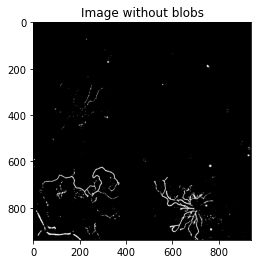

In [75]:
plt.title("Image without blobs")
plt.imshow(mask_dendrites, cmap="gray")
plt.show()

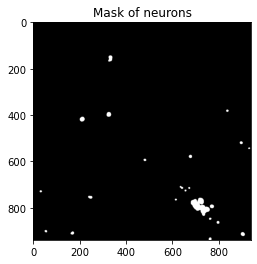

In [72]:
plt.title("Mask of neurons")
plt.imshow(mask_neurons, cmap="gray")
plt.show()